# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Humaidi Fikri
- **Email:** kievmajor1@gmail.com
- **ID Dicoding:** humaidi_fikri_aNn2

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca mempengaruhi jumlah penggunaan sepeda?
- Jam berapa  biasanya orang-orang menggunakan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Data Wrangling

### Gathering Data

In [2]:
df = pd.read_csv('hour.csv') #karena saya menjalankan menggunakan google colab
# df = pd.read_csv('data/hour.csv') jika tidak menggunakan google colab
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
# Cek Missing Value

df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# Cek duplikasi data

df.duplicated().sum()

0

In [6]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Sekarang kita menghapus kolom yang tidak ada kaitannya dengan pertanyaan yang sudah ditentukan, yaitu:
- instant : karena hanya berupa indeks catatan
- windspeed : tidak ada pertanyaan terkait tentang kolom ini

In [7]:
df.drop(columns=['instant','windspeed'],inplace=True)
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,1,1


Selanjutnya, kita akan mengubah beberapa kolom yang tidak seharusnya, seperti mengkonversi tipe data, mengganti nama kolom, dan mengkonversi kolom menjadi kategorikal

Mengganti nama kolom

In [8]:
df.rename(columns={
    'dteday':'datetime',
    'yr':'year',
    'mnth':'month',
    'hr':'hour',
    'weathersit':'weather_situation',
    'cnt':'count'
},inplace=True)
df.head()

,datetime,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,1,1


Mengubah tipe data kolom datetime ke tipe data yang sesuai

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           17379 non-null  datetime64[ns]
 1   season             17379 non-null  int64         
 2   year               17379 non-null  int64         
 3   month              17379 non-null  int64         
 4   hour               17379 non-null  int64         
 5   holiday            17379 non-null  int64         
 6   weekday            17379 non-null  int64         
 7   workingday         17379 non-null  int64         
 8   weather_situation  17379 non-null  int64         
 9   temp               17379 non-null  float64       
 10  atemp              17379 non-null  float64       
 11  hum                17379 non-null  float64       
 12  casual             17379 non-null  int64         
 13  registered         17379 non-null  int64         
 14  count 

Mengubah kolom menjadi kategorikal

In [10]:
df['season'] = df['season'].map({
    1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'
})
df.head()

,datetime,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp,atemp,hum,casual,registered,count
0,2011-01-01,Winter,0,1,0,0,6,0,1,0.24,0.2879,0.81,3,13,16
1,2011-01-01,Winter,0,1,1,0,6,0,1,0.22,0.2727,0.80,8,32,40
2,2011-01-01,Winter,0,1,2,0,6,0,1,0.22,0.2727,0.80,5,27,32
3,2011-01-01,Winter,0,1,3,0,6,0,1,0.24,0.2879,0.75,3,10,13
4,2011-01-01,Winter,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,1,1


In [11]:
df['year'] = df['datetime'].dt.year
df.head()

,datetime,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp,atemp,hum,casual,registered,count
0,2011-01-01,Winter,2011,1,0,0,6,0,1,0.24,0.2879,0.81,3,13,16
1,2011-01-01,Winter,2011,1,1,0,6,0,1,0.22,0.2727,0.80,8,32,40
2,2011-01-01,Winter,2011,1,2,0,6,0,1,0.22,0.2727,0.80,5,27,32
3,2011-01-01,Winter,2011,1,3,0,6,0,1,0.24,0.2879,0.75,3,10,13
4,2011-01-01,Winter,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0,1,1


In [12]:
df['month'] = df['datetime'].dt.month_name()
df.head()

,datetime,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp,atemp,hum,casual,registered,count
0,2011-01-01,Winter,2011,January,0,0,6,0,1,0.24,0.2879,0.81,3,13,16
1,2011-01-01,Winter,2011,January,1,0,6,0,1,0.22,0.2727,0.80,8,32,40
2,2011-01-01,Winter,2011,January,2,0,6,0,1,0.22,0.2727,0.80,5,27,32
3,2011-01-01,Winter,2011,January,3,0,6,0,1,0.24,0.2879,0.75,3,10,13
4,2011-01-01,Winter,2011,January,4,0,6,0,1,0.24,0.2879,0.75,0,1,1


In [13]:
df['weekday'] = df['datetime'].dt.day_name()
df.head()

,datetime,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp,atemp,hum,casual,registered,count
0,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,3,13,16
1,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,8,32,40
2,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,5,27,32
3,2011-01-01,Winter,2011,January,3,0,Saturday,0,1,0.24,0.2879,0.75,3,10,13
4,2011-01-01,Winter,2011,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0,1,1


In [14]:
df['weather_situation'] = df['weather_situation'].map({
    1: 'Clear',
    2: 'Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Snow/Rain'
})
df.head()

,datetime,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp,atemp,hum,casual,registered,count
0,2011-01-01,Winter,2011,January,0,0,Saturday,0,Clear,0.24,0.2879,0.81,3,13,16
1,2011-01-01,Winter,2011,January,1,0,Saturday,0,Clear,0.22,0.2727,0.80,8,32,40
2,2011-01-01,Winter,2011,January,2,0,Saturday,0,Clear,0.22,0.2727,0.80,5,27,32
3,2011-01-01,Winter,2011,January,3,0,Saturday,0,Clear,0.24,0.2879,0.75,3,10,13
4,2011-01-01,Winter,2011,January,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0,1,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           17379 non-null  datetime64[ns]
 1   season             17379 non-null  object        
 2   year               17379 non-null  int64         
 3   month              17379 non-null  object        
 4   hour               17379 non-null  int64         
 5   holiday            17379 non-null  int64         
 6   weekday            17379 non-null  object        
 7   workingday         17379 non-null  int64         
 8   weather_situation  17379 non-null  object        
 9   temp               17379 non-null  float64       
 10  atemp              17379 non-null  float64       
 11  hum                17379 non-null  float64       
 12  casual             17379 non-null  int64         
 13  registered         17379 non-null  int64         
 14  count 

Terlihat dari info di atas masih ada tipe data yang tidak sesuai mari kita ubah!

In [16]:
df['season'] = df['season'].astype('category')
df['year'] = df['year'].astype('category')
df['month'] = df['month'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['hour'] = df['hour'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather_situation'] = df['weather_situation'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           17379 non-null  datetime64[ns]
 1   season             17379 non-null  category      
 2   year               17379 non-null  category      
 3   month              17379 non-null  category      
 4   hour               17379 non-null  category      
 5   holiday            17379 non-null  category      
 6   weekday            17379 non-null  category      
 7   workingday         17379 non-null  category      
 8   weather_situation  17379 non-null  category      
 9   temp               17379 non-null  float64       
 10  atemp              17379 non-null  float64       
 11  hum                17379 non-null  float64       
 12  casual             17379 non-null  int64         
 13  registered         17379 non-null  int64         
 14  count 

## Exploratory Data Analysis (EDA)

### Explore ...

In [17]:
df.groupby(by='datetime').agg({
    'count':['sum','mean']
}).head()

count           
             sum       mean
datetime                   
2011-01-01   985  41.041667
2011-01-02   801  34.826087
2011-01-03  1349  61.318182
2011-01-04  1562  67.913043
2011-01-05  1600  69.565217

In [18]:
df.groupby(by='year').agg({
    'count':['sum','mean']
}).head()

count            
          sum        mean
year                     
2011  1243103  143.794448
2012  2049576  234.666361

In [19]:
df.groupby(by='month').agg({
    'count':['sum','mean']
}).head()

count            
             sum        mean
month                       
April     269094  187.260960
August    351194  238.097627
December  211036  142.303439
February  151352  112.865026
January   134933   94.424773

In [20]:
df.groupby(by=['year','month']).agg({
    'count':['sum','mean']
})

count            
                   sum        mean
year month                        
2011 April       94870  131.947149
     August     136691  186.991792
     December    87323  117.844804
     February    48215   74.291217
     January     38189   55.507267
     July       141341  189.974462
     June       143512  199.322222
     March       64045   87.732877
     May        135821  182.555108
     November   102167  142.095967
     October    123511  166.232840
     September  127418  177.709902
2012 April      174224  242.651811
     August     214503  288.310484
     December   123713  166.729111
     February   103137  149.041908
     January     96744  130.558704
     July       203607  273.665323
     June       202830  281.708333
     March      164875  221.904441
     May        195865  263.259409
     November   152664  212.623955
     October    198841  280.848870
     September  218573  303.573611

In [21]:
df.groupby(by='season').agg({
    'count':['sum','mean']
})

count            
            sum        mean
season                     
Fall     841613  198.868856
Spring   918589  208.344069
Summer  1061129  236.016237
Winter   471348  111.114569

In [22]:
df.groupby(by='weekday').agg({
    'count':['sum','mean']
})

count            
              sum        mean
weekday                      
Friday     487790  196.135907
Monday     455503  183.744655
Saturday   477807  190.209793
Sunday     444027  177.468825
Thursday   485395  196.436665
Tuesday    469109  191.238891
Wednesday  473048  191.130505

In [23]:
df.groupby(by='workingday').agg({
    'count':['sum','mean']
}).head()

count            
                sum        mean
workingday                     
0           1000269  181.405332
1           2292410  193.207754

In [24]:
df.groupby(by='holiday').agg({
    'count':['sum','mean']
}).head()

count           
             sum       mean
holiday                    
0        3214244  190.42858
1          78435  156.87000

In [25]:
df.groupby(by='hour').agg({
    'count':['sum','mean']
}).head()

count           
        sum       mean
hour                  
0     39130  53.898072
1     24164  33.375691
2     16352  22.869930
3      8174  11.727403
4      4428   6.352941

In [26]:
df.groupby(by='weather_situation').agg({
    'count':['sum','mean']
})

count            
                       sum        mean
weather_situation                     
Clear              2338173  204.869272
Cloudy              795952  175.165493
Heavy Snow/Rain        223   74.333333
Light Snow/Rain     158331  111.579281

In [27]:
df.groupby(by='weather_situation').agg({
    'temp':'mean',
    'atemp':'mean',
    'hum':'mean',
})

,temp,atemp,hum
weather_situation,,,
Clear,0.511054,0.488387,0.573747
Cloudy,0.474445,0.456591,0.698807
Heavy Snow/Rain,0.186667,0.186900,0.883333
Light Snow/Rain,0.456688,0.436386,0.827632


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana cuaca mempengaruhi jumlah penggunaan sepeda?


In [28]:
weathersit_df = df.groupby(by='weather_situation').agg({
    'count':'sum'
}).reset_index()
weathersit_df

,weather_situation,count
0,Clear,2338173
1,Cloudy,795952
2,Heavy Snow/Rain,223
3,Light Snow/Rain,158331


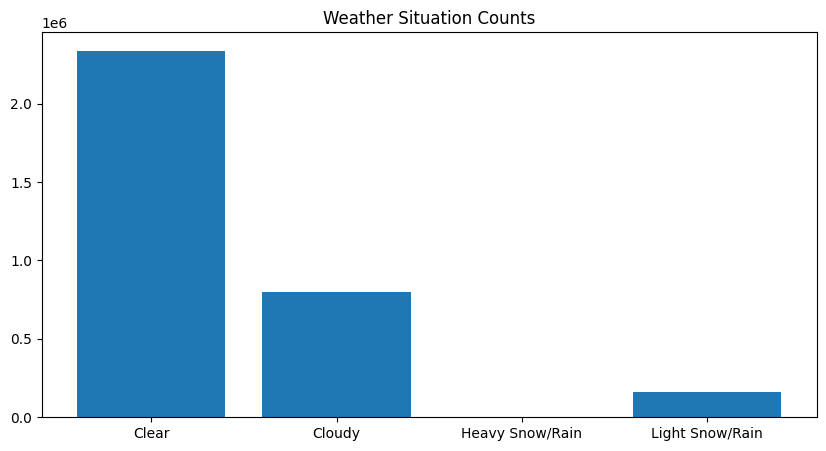

In [29]:
plt.figure(figsize=(10,5))
plt.bar(weathersit_df['weather_situation'], weathersit_df['count'])
plt.title('Weather Situation Counts')
plt.show()

In [30]:
temp_df = df.groupby(by='weather_situation').agg({
    'temp':'mean',
    'atemp':'mean',
    'hum':'mean',
}).reset_index()
temp_df

,weather_situation,temp,atemp,hum
0,Clear,0.511054,0.488387,0.573747
1,Cloudy,0.474445,0.456591,0.698807
2,Heavy Snow/Rain,0.186667,0.186900,0.883333
3,Light Snow/Rain,0.456688,0.436386,0.827632


Terlihat dari hasil analisa di atas, ternyata cuaca cukup berpengaruh untuk menggunakan sepeda, ketika kondisi cuaca cerah orang-orang cenderung menggunakan sepeda mereka daripada cuaca salju/hujan lebat. Hal ini bisa terjadi jika orang-orang memilih menggunakan kendaraan bermotor untuk pergi ke luar atau memilih untuk menetap di rumah

### Pertanyaan 2: Jam berapa  biasanya orang-orang menggunakan sepeda?


In [31]:
hour_df = df.groupby(by='hour').agg({
    'count':'mean'
}).reset_index()
hour_df.head()

,hour,count
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941


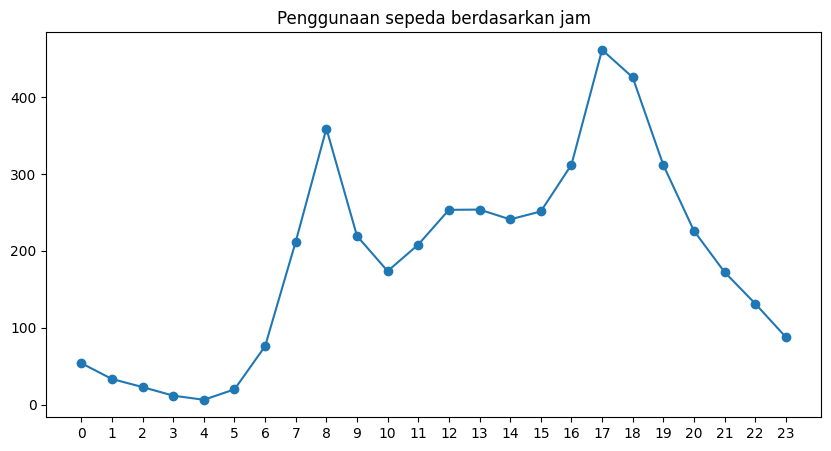

In [32]:
plt.figure(figsize=(10,5))
# sns.boxplot(data=hour_df,x='hour',y='count')
plt.plot(hour_df['hour'],hour_df['count'],marker='o')
plt.title("Penggunaan sepeda berdasarkan jam")
plt.xticks(hour_df['hour'])
plt.show()

Berdasarkan hasil analisa di atas, penggunaan sepeda cenderung dilakukan pada pagi hari ketika siang hari penggunaannya cukup menurun mungkin disebabkan dengan aktifitas dalam ruangan, akan tetapi penggunaannya kembali melonjak pada sore hari menjelang malam ketika orang-orang selesai beraktifitas.

## Conclusion

- Conclusion pertanyaan 1 :
  Meskipun jumlah penggunaan sepeda pada cuaca salju/hujan lebat sangat sedikit tetap saja orang-orang lebih memilih bersepeda ketika cuaca cerah. Ini terlihat dari visual pada bagian Cloudy(berawan) juga lebih sedikit daripada Clear(cerah), bisa jadi dikarenakan pagi hari cuaca sedang cerah dan berawan ketika siang hari. Bisa dilihat dari visualisasi pada pertanyaan kedua, orang-orang lebih sedikit ketika menggunakan sepeda di siang hari yaitu antara jam 10 sampai 15 sore.

- Conclusion pertanyaan 2 :
  Berdasarkan hasil analisis, terlihat penggunaan sepeda cenderung tinggi pada pagi hari, kemudian menurun pada siang hari, mungkin disebabkan oleh adanya aktifitas dalam ruangan seperti bekerja atatu sekolah. Namun penggunaan sepeda kembali meningkat pada sore hari menjelang malam, ketika orang-orang selesai dengan aktifitas mereka. Hali ini menunjukkan adanya pola tertentu dalam penggunaan sepeda, dimana pengguna cenderung menggunakan sepeda pada waktu-waktu tertentu dalam sehari, yang mungkin berkaian dengan kebutuhan transportasi mereka.